In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

data = pd.read_csv("S:/NUS/Year Two/UROPS/firstlab_xy.csv")
'''
duhao
lab_ranges = {'ALBUMIN':[3.5, 5.5], 
              'BICARBONATE': [22,32],
              'BUN': [6,20],
              'CALCIUM': [8.4,10.3],
              'CHLORIDE': [96,108],
              'CREATININE': [0.4,1.1],
              'GLUCOSE':[70.0, 100.0],
              'HEMOGLOBIN': [11.2,15.7],
              'LACTATE': [0.5,2.0],
              'MAGNESIUM': [1.6,2.6],
              'PHOSPHATE': [2.7,4.5],
              'PLATELET': [150,400],
              'POTASSIUM': [3.3,5.1],
              'SODIUM': [133,145],
              'FREECALCIUM': [1.1, 1.35],
              'WBC': [3.5, 10.5]
             }

lab_units = {
        'ALBUMIN': 'g/dL', 
        'BICARBONATE': 'mEq/L',
        'BUN': 'mEq/L',
        'CALCIUM': 'mg/dL',
        'CHLORIDE': 'mEq/L',
        'CREATININE': 'mEq/L',
        'GLUCOSE': 'mg/dL',
        'HEMOGLOBIN': 'g/dL',
        'LACTATE': 'mmol/L',
        'MAGNESIUM': 'mmol/L',
        'PHOSPHATE': 'mg/dL',
        'PLATELET': 'K/uL',
        'POTASSIUM': 'mEq/L',
        'SODIUM':'mmol/L',
        'FREECALCIUM': 'mmol/L',
        'WBC': ''
       }
'''
lab_ranges = {'ALBUMIN':        [3.5, 5.5],                
              'BICARBONATE':    [21,29],                     
              'BUN':            [10,20],                                          
              'CALCIUM':        [8.5,10.5],                                       
              'FREECALCIUM':    [1.05,1.37],                  
              'CHLORIDE':       [98,106],                       
              'MAGNESIUM':      [1.8,3],                   
              'PHOSPHATE':      [3,4.5],                     
              'HEMOGLOBIN':     [12,18],                   
              'SODIUM':         [136,145],                
              'CREATININE':     [0.5,1.5],                   
              'PLATELET':       [150,400],                  
              'POTASSIUM':      [3.3,5.5],                 
              'LACTATE':        [0.5,2.0],                      
              'WBC':            [4.5,11],                     
              'GLUCOSE':        [75.0, 115.0]            
             } 

lab_units = {  'ALBUMIN':        'g/dL',          
              'BICARBONATE':    'mEq/L',           
              'BUN':            'mg/dL',                           
              'CALCIUM':        'mg/dL',                                
              'FREECALCIUM':    'mmol/L',        
              'CHLORIDE':       'mEq/L',             
              'MAGNESIUM':      'mg/dL',         
              'PHOSPHATE':      'mg/dL',           
              'HEMOGLOBIN':     'g/dL',          
              'SODIUM':         'mEq/L',        
              'CREATININE':     'mg/dL',           
              'PLATELET':       'K/uL',            
              'POTASSIUM':      'mEq/L',         
              'LACTATE':        'mmol/L',            
              'WBC':            'K/uL',            
              'GLUCOSE':        'mg/dL'         
             } 

mort_data = data[data['mort_icu']==1]
surv_data = data[data['mort_icu']==0]

In [20]:
#what is the proper cutoff?
surv_data = data[data['mort_icu']==0]
surv_lab_df = surv_data.loc[surv_data['albumin_min'].dropna().index,:]
los_cutoff =  surv_lab_df['los'].quantile(0.25)
print(los_cutoff)
n_surv = surv_data.albumin_min.dropna().count()
#los_quarter = surv_data.sort_values(by=['los'])['los'].dropna().head(int(n_surv/4)).max().round(2)
best_lab = surv_data.sort_values(by=['los'])['los'].dropna().head(int(n_surv / 4)).max().round(2)

print(best_lab)

1.40835
0.9


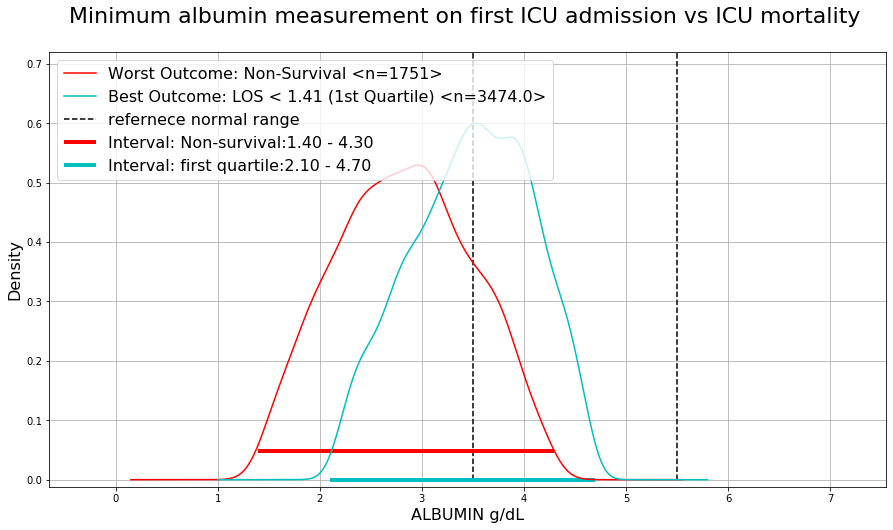

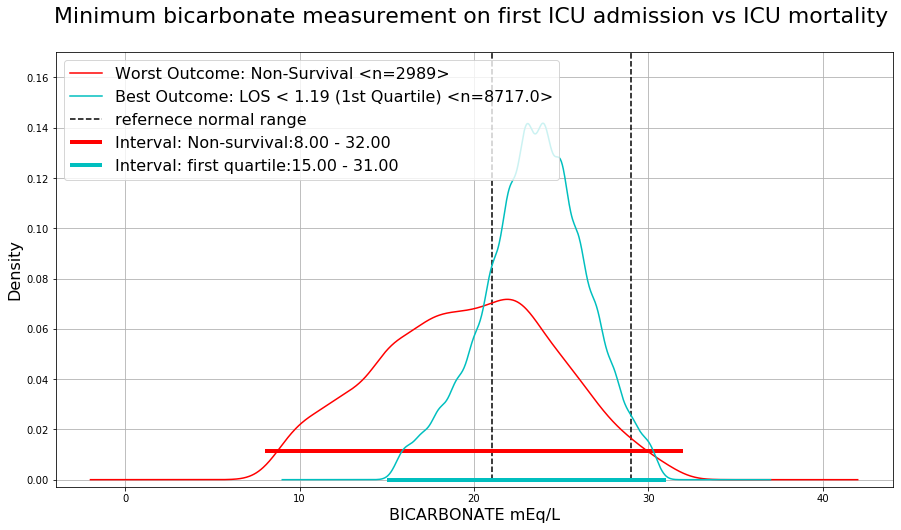

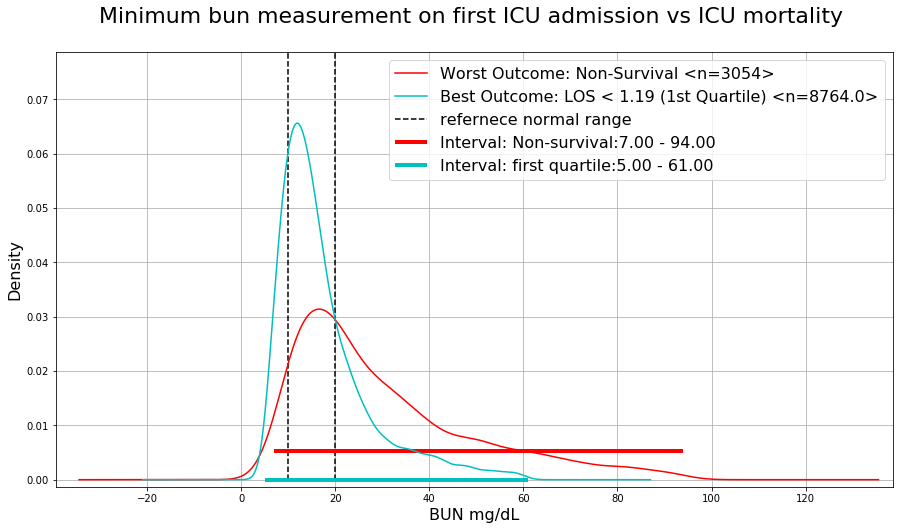

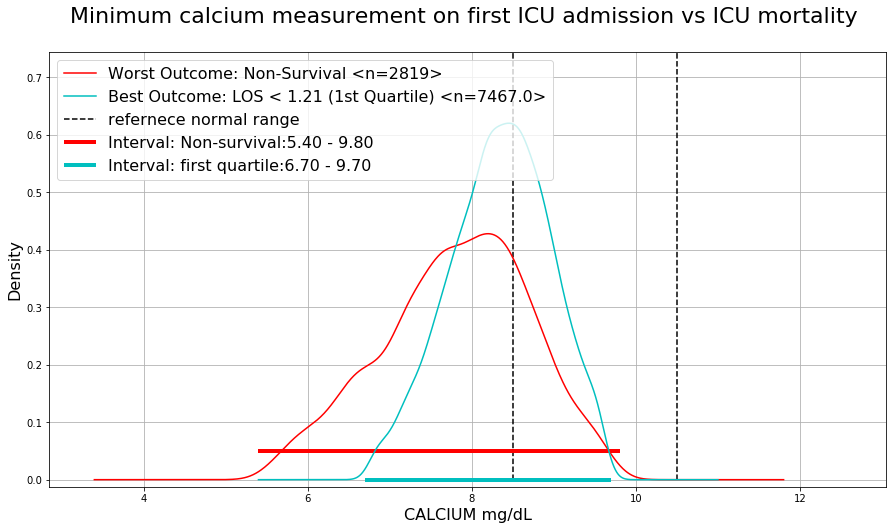

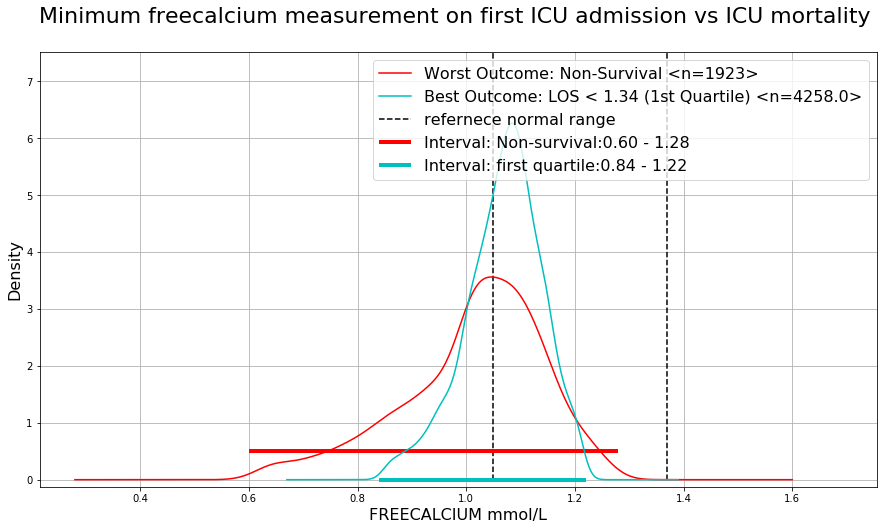

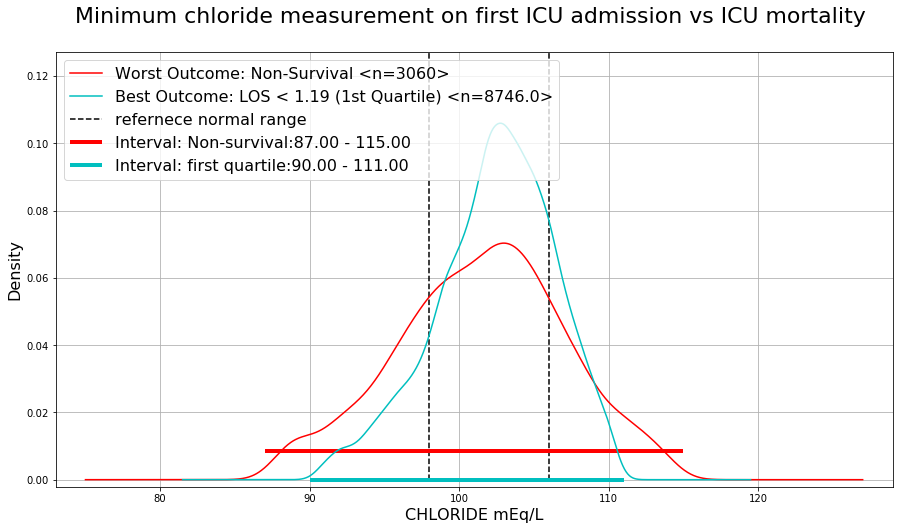

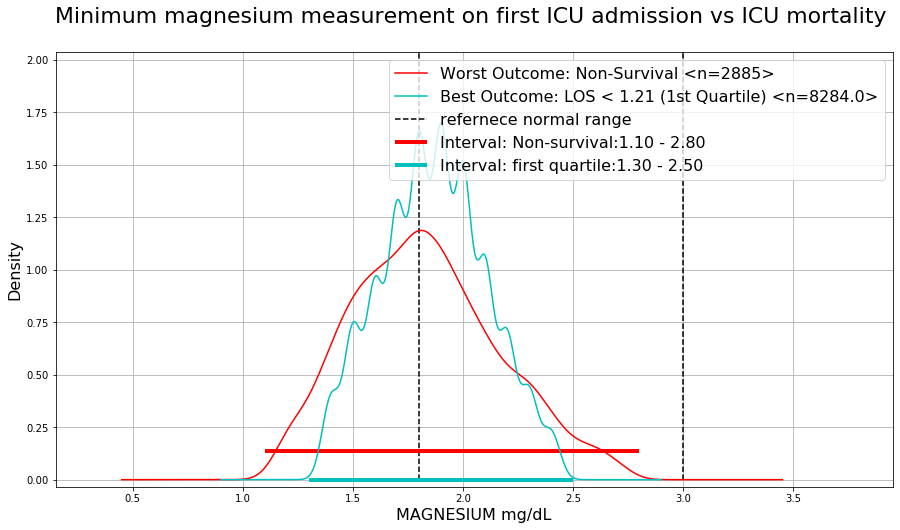

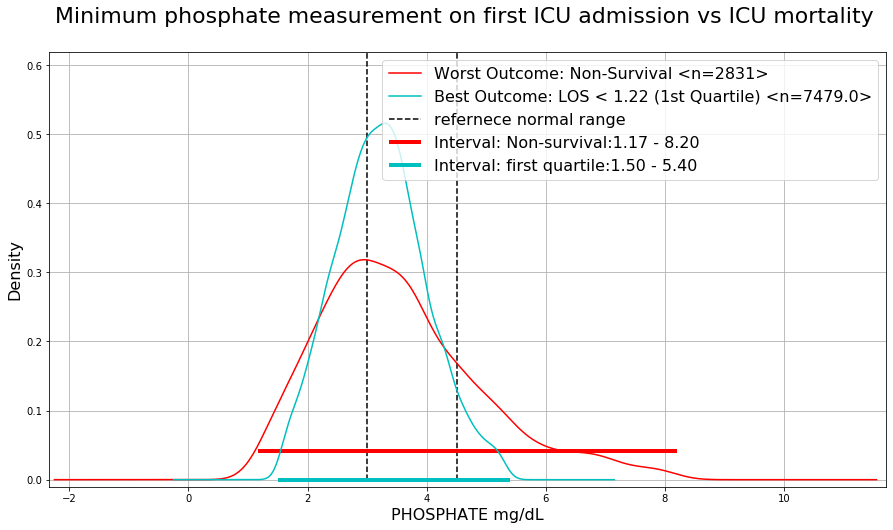

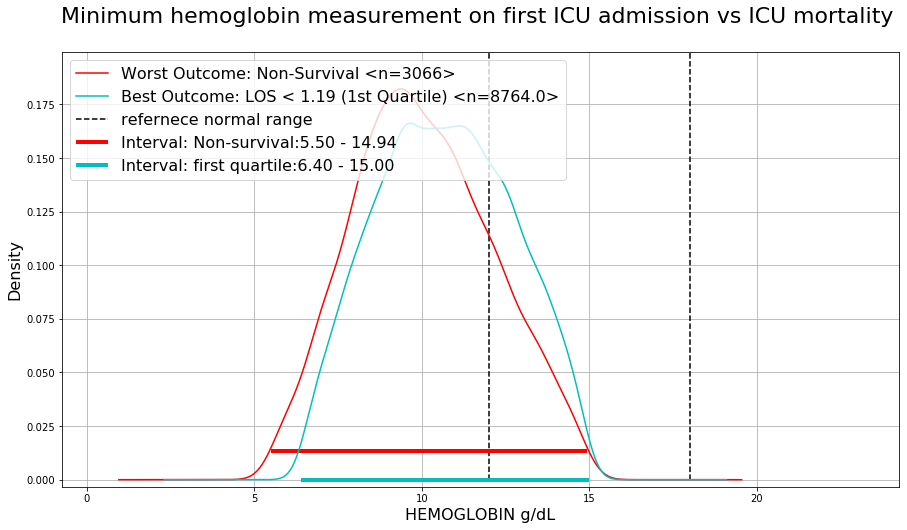

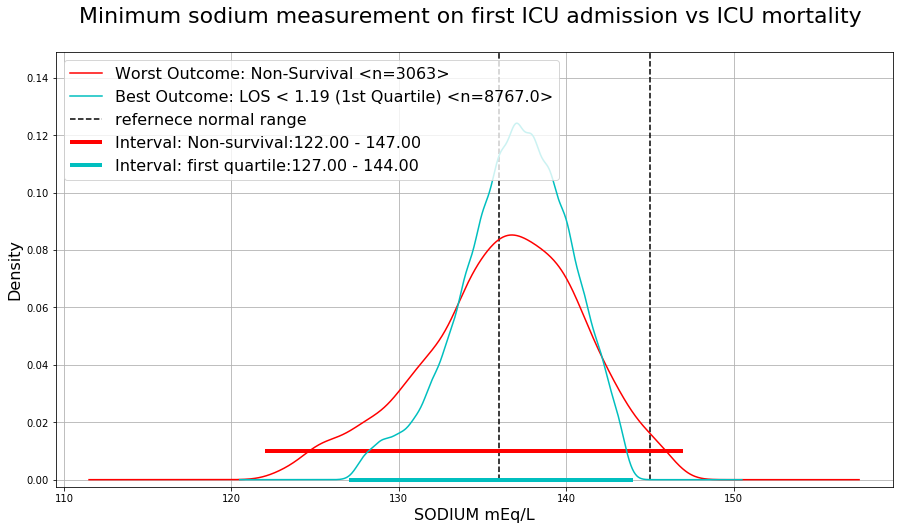

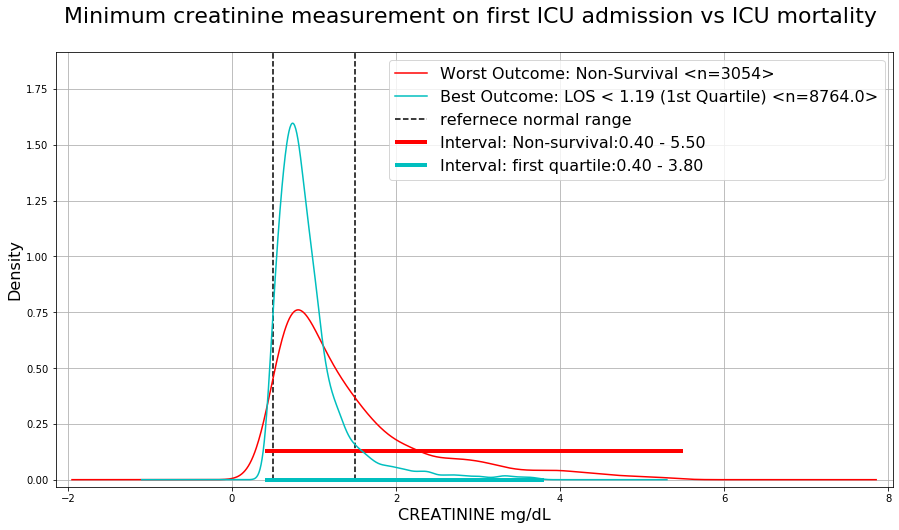

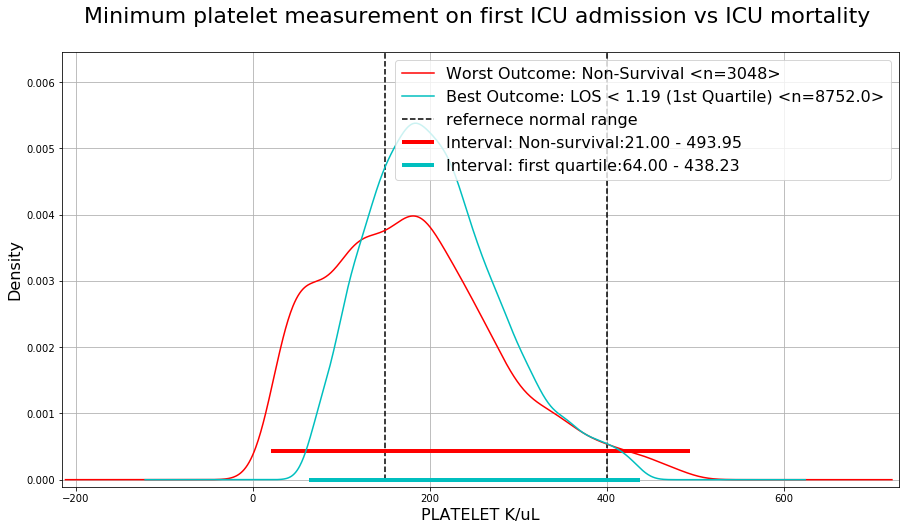

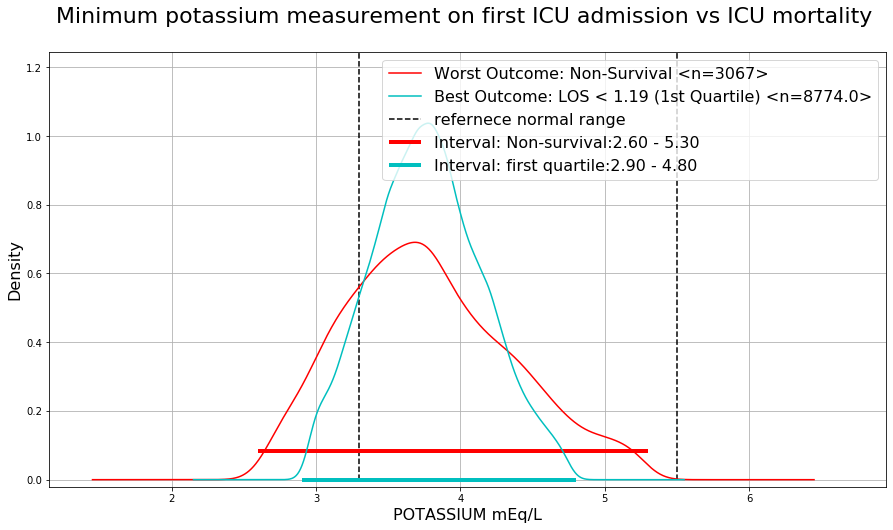

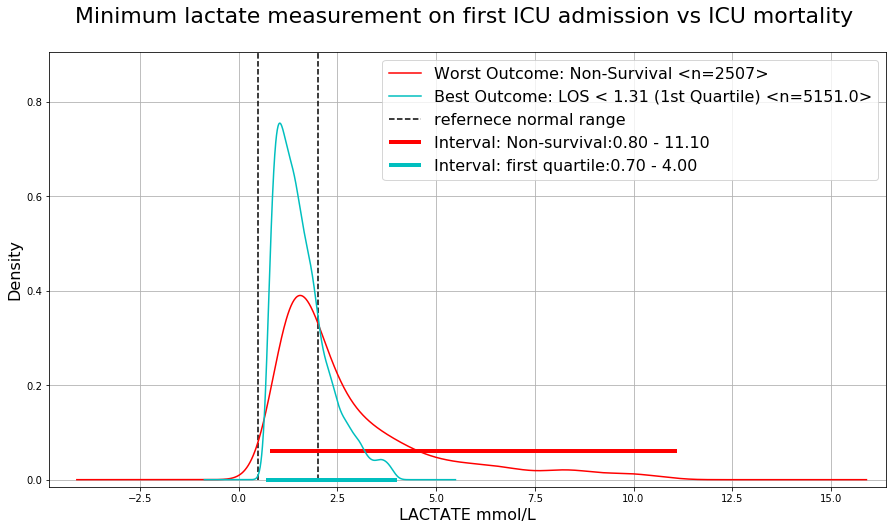

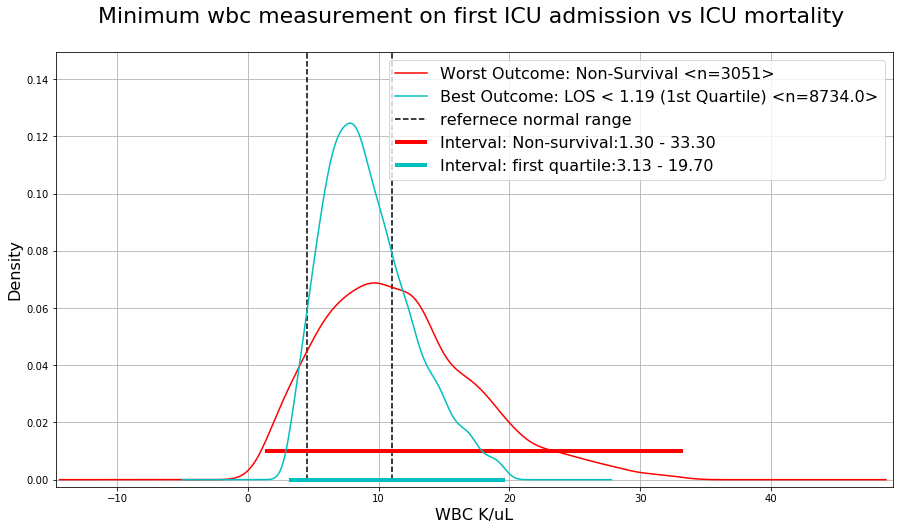

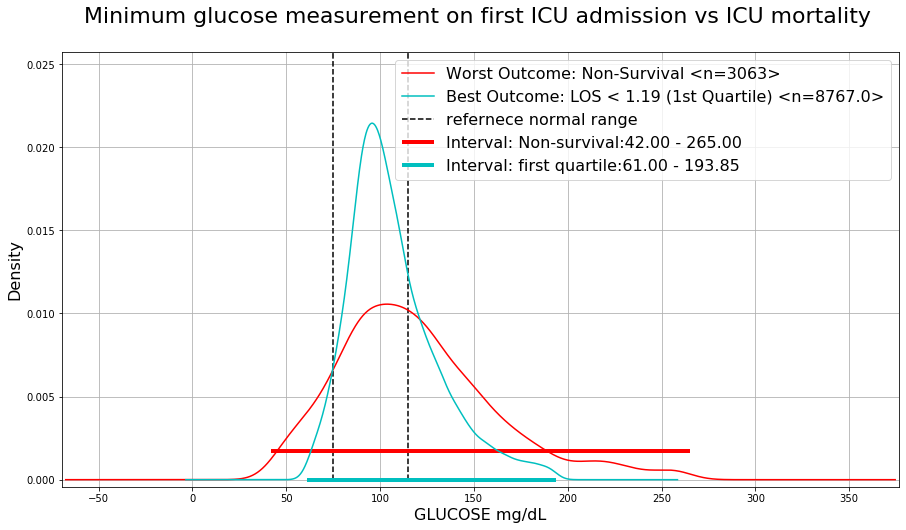

In [10]:
for i, j in iter(lab_units.items()):
    
    n_mort = mort_data[i.lower() + '_min'].dropna().count()
    n_surv = surv_data[i.lower() + '_min'].dropna().count()
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    #plot worst outcome
    worst_lab = mort_data[i.lower() + '_min'].dropna()
    [q1, q2] = worst_lab.quantile(q = [0.025,0.975])
    #plt.xlim(q1,q2)
    worst_lab = worst_lab[worst_lab > q1]
    worst_lab = worst_lab[worst_lab < q2]  
    worst_lab.plot.kde(alpha = 1.0, color='r',label='Worst Outcome: Non-Survival <n={}>'.format(n_mort))
    
    
    
    #plot best outcome 
    surv_lab_df = surv_data.loc[surv_data[i.lower() + '_min'].dropna().index,:]
    los_cutoff =  surv_lab_df['los'].quantile(0.25).round(2)
    quarter = round(n_surv/4)
    best_lab = surv_data.sort_values(by=['los'])[i.lower() + '_min'].dropna().head(int(quarter))
    [p1, p2] = best_lab.quantile(q = [0.025,0.975])
    best_lab = best_lab[best_lab > p1]
    best_lab = best_lab[best_lab < p2] 
    best_lab.plot.kde(alpha = 1.0, color='c',label='Best Outcome: LOS < {} (1st Quartile) <n={}>'.format(los_cutoff, quarter))
    
                       
    #making the plot prettier
    plt.title('Minimum {} measurement on first ICU admission '.format(i.lower()) +
               'vs ICU mortality \n', fontsize= 22)
    plt.xlabel(i + ' ' + j, fontsize= 16)
    plt.ylabel("Density", fontsize= 16)
    
    plot_range = [min(q1,p1,lab_ranges[i][0]),max(q2,p2,lab_ranges[i][1])]
    diff = plot_range[1] - plot_range[0]
    plt.xlim(plot_range[0] - 0.5*diff, plot_range[1] + 0.5*diff)
    
    xs = np.linspace(plot_range[0], plot_range[1], 600)
    density = gaussian_kde(best_lab)
    ys = density(xs)
    index = np.argmax(ys)
    maxy = ys[index]
    plt.ylim(-maxy*0.02, maxy*1.2)
    
    plt.vlines(lab_ranges[i][0], ymin=0, ymax=maxy*1.2, colors='k', linestyles='--', label='refernece normal range')
    plt.vlines(lab_ranges[i][1], ymin=0, ymax=maxy*1.2, colors='k', linestyles='--')
    
    #interval line
    plt.hlines(y=maxy*0.08, xmin = q1, xmax = q2, linewidth=4, linestyle='-', color='r', label='Interval: Non-survival:{} - {}'.format(format(q1,'.2f'),format(q2,'.2f')))
    plt.hlines(y=0, xmin = p1, xmax = p2, linewidth=4, linestyle='-', color='c', label='Interval: first quartile:{} - {}'.format(format(p1,'.2f'),format(p2,'.2f')))
    plt.grid(True)
    
    if i in ['ALBUMIN','SODIUM', 'HEMOGLOBIN','CHLORIDE','CALCIUM','BICARBONATE']:
        plt.legend(fontsize=16, loc=2)
    else:
        plt.legend(fontsize=16, loc=1)
  
    #plt.tick_params(axis='both', labelsize=16)
    plt.savefig("mimic_figure/MINMAX/{}_MIN.png".format(i))
    
    plt.show()
    

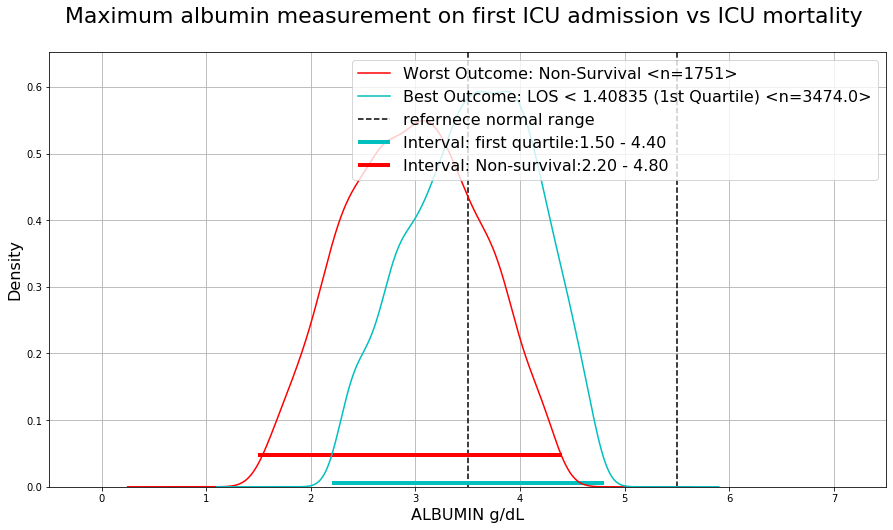

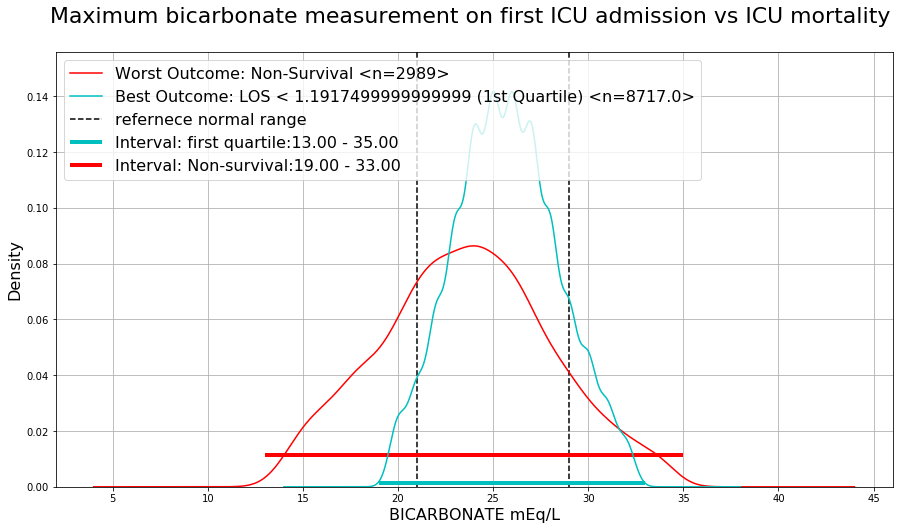

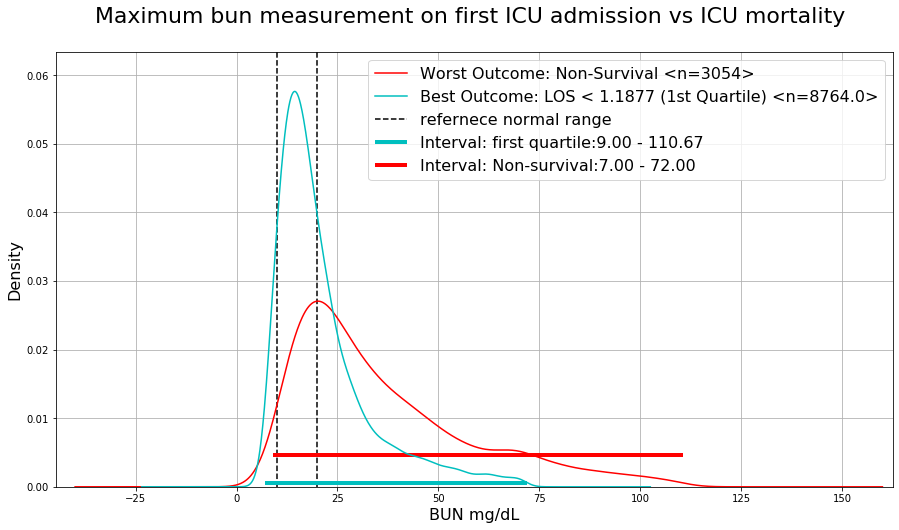

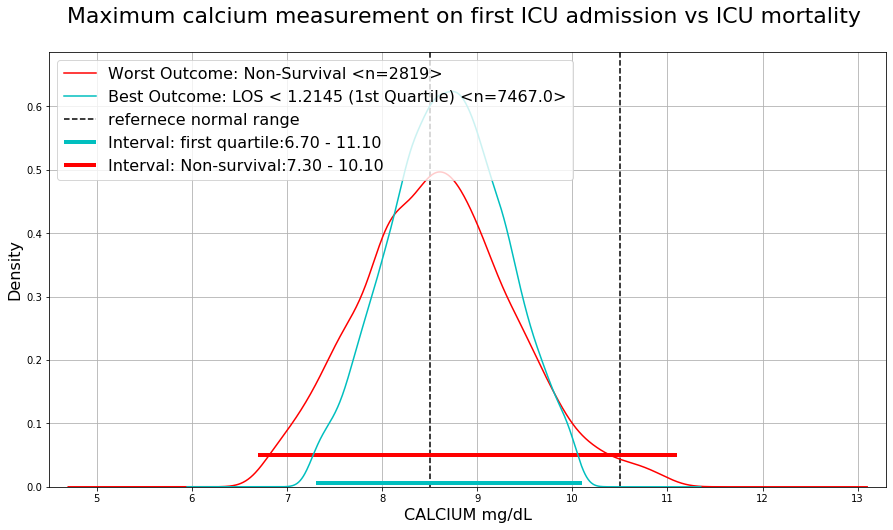

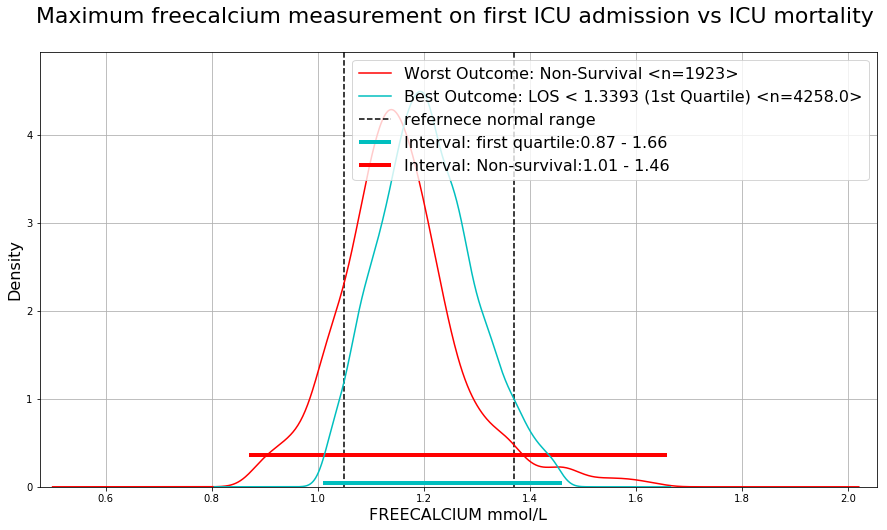

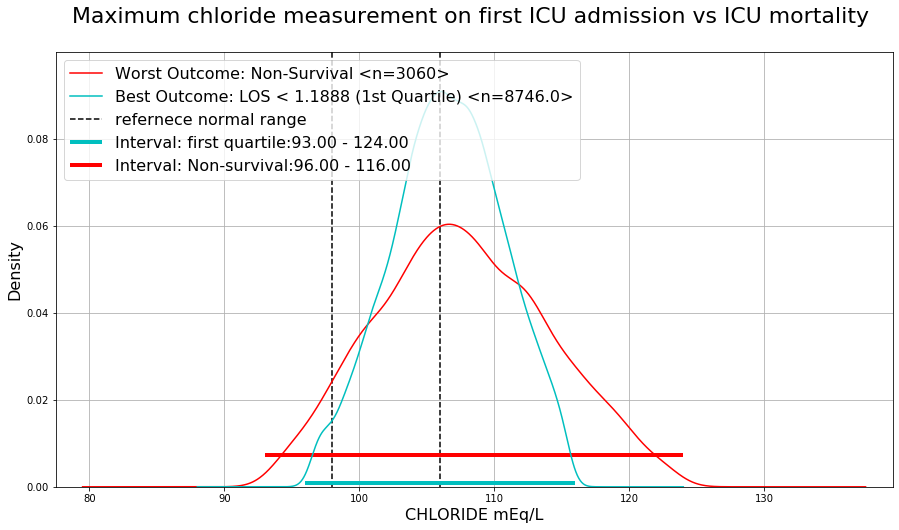

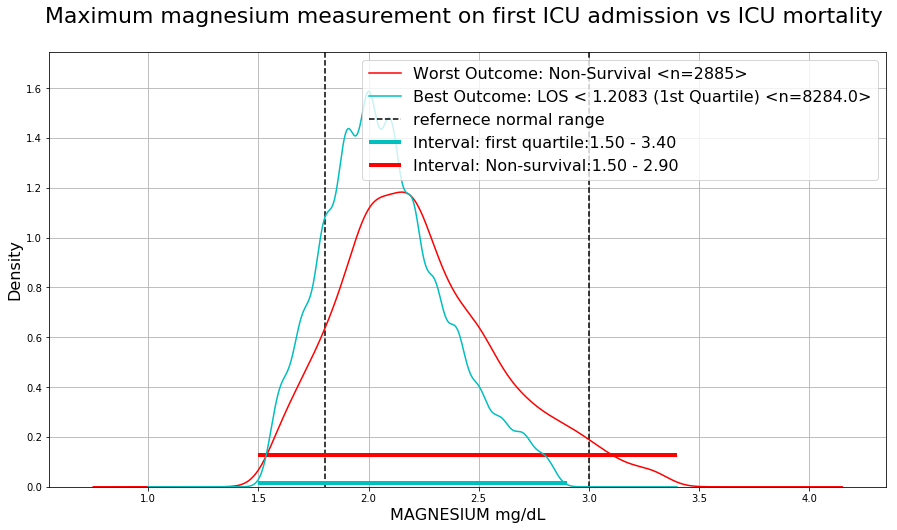

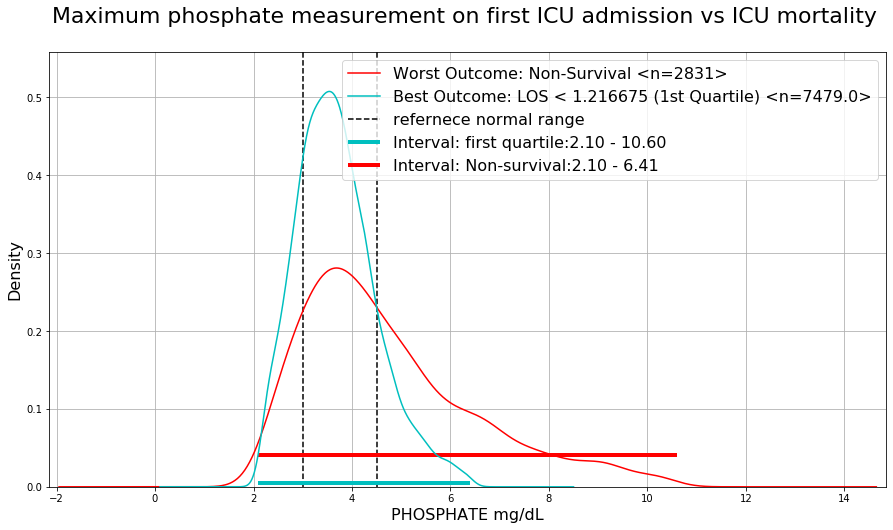

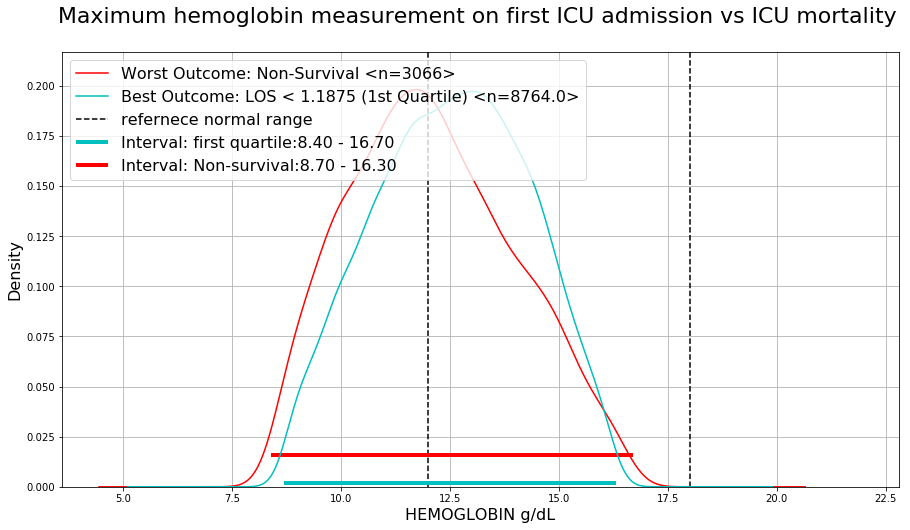

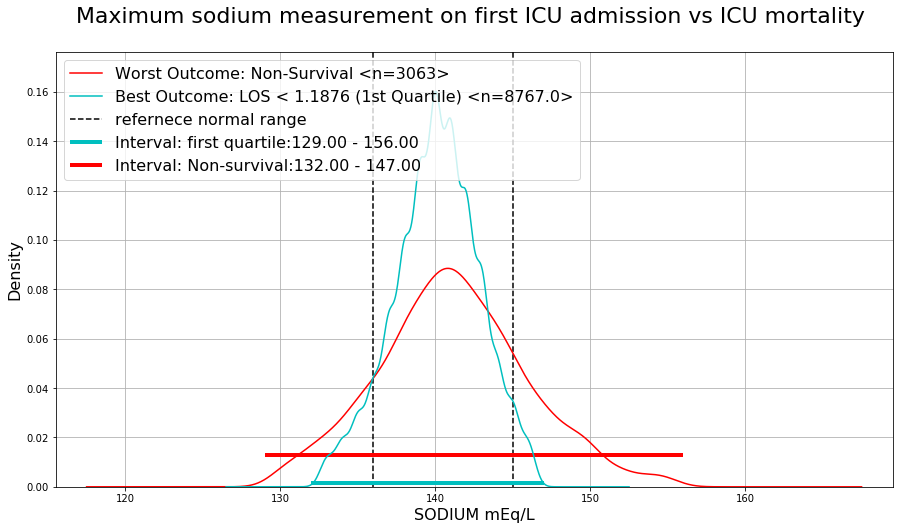

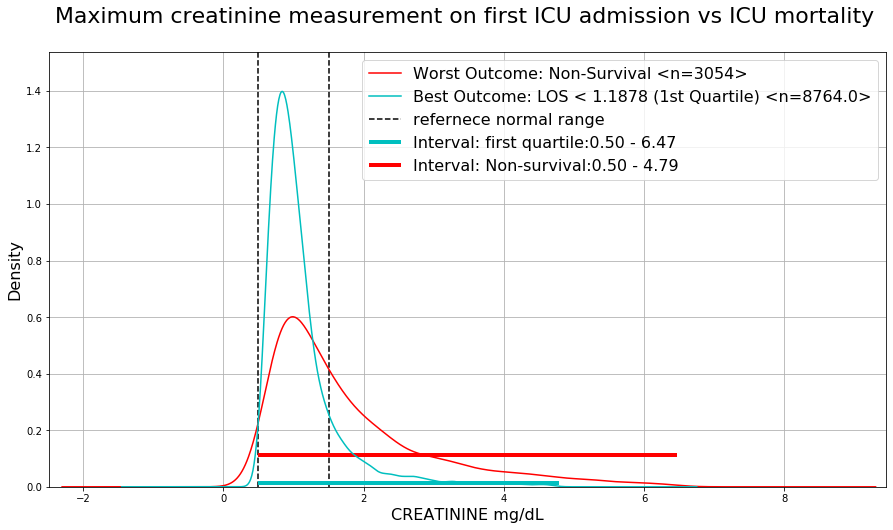

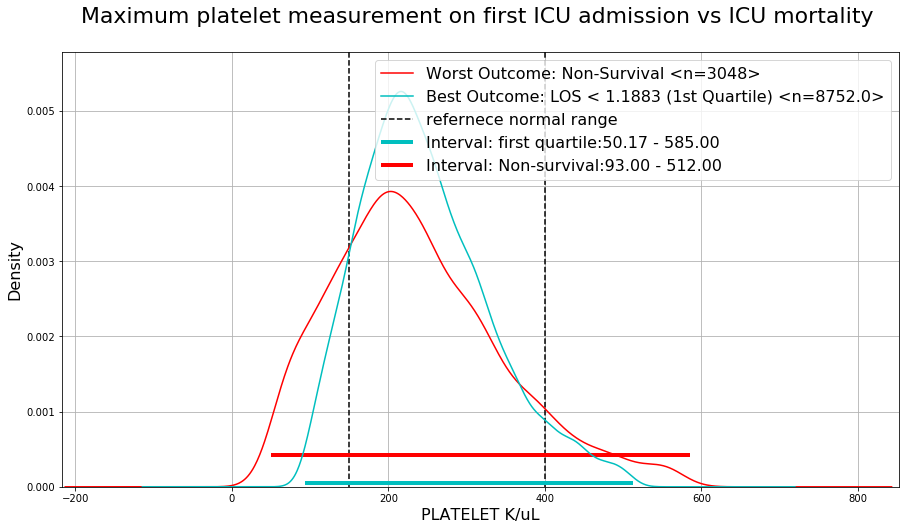

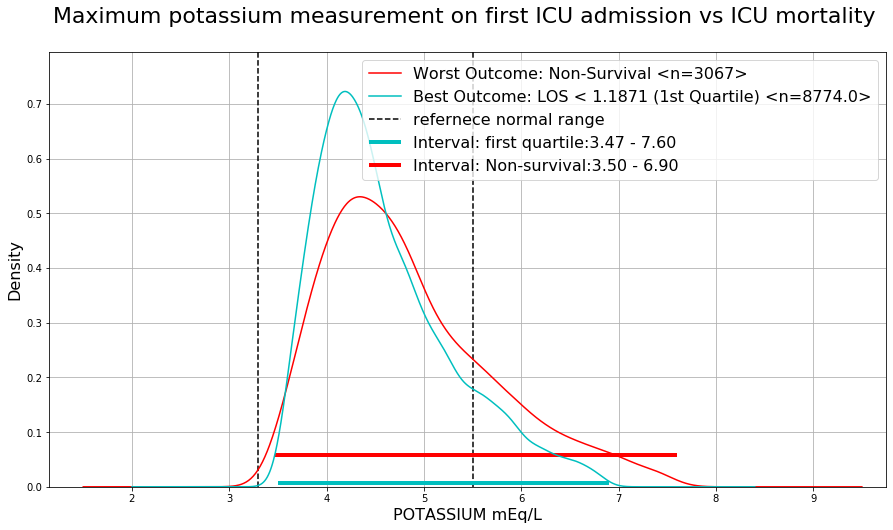

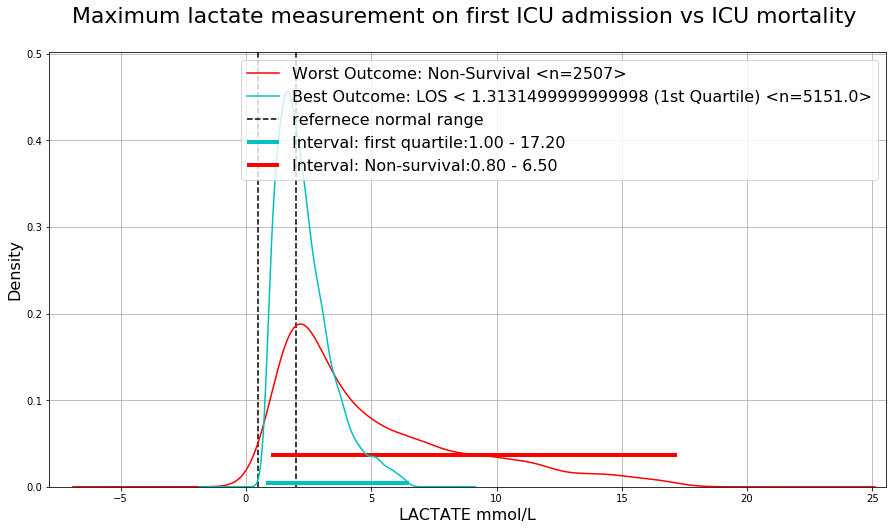

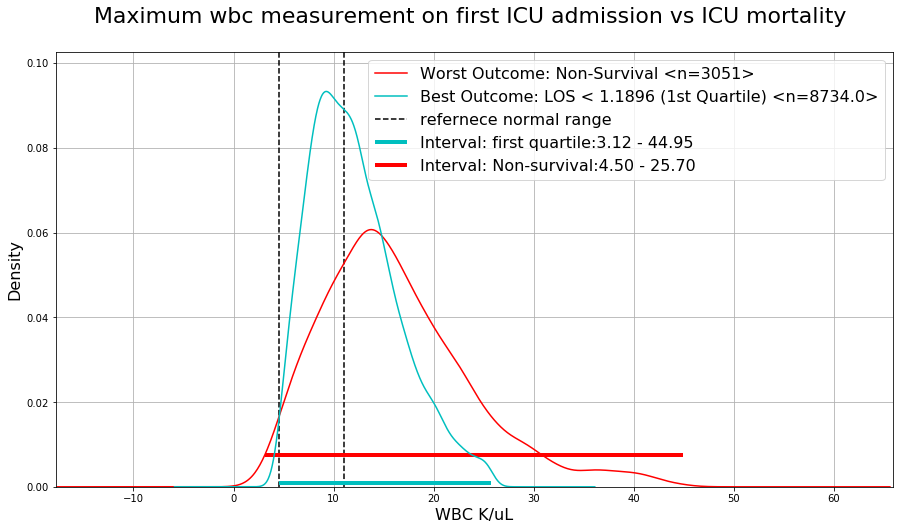

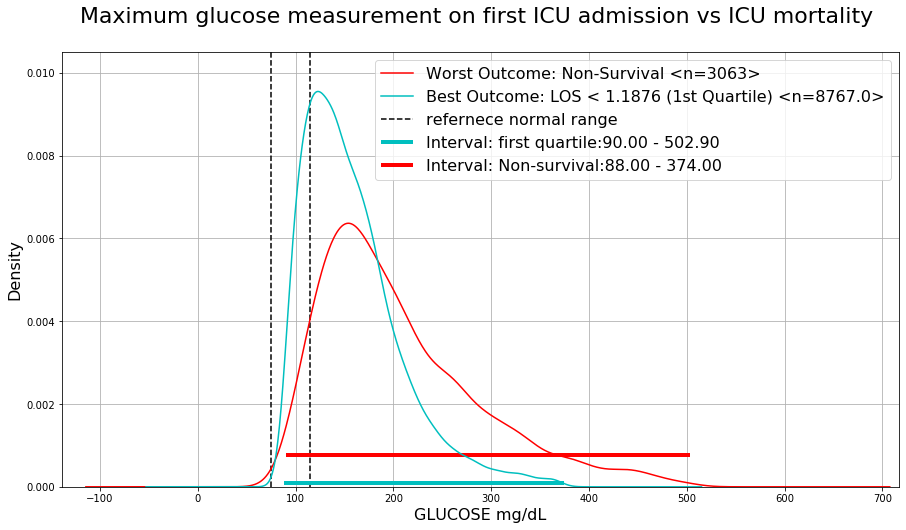

In [11]:
for i, j in iter(lab_units.items()):
    
    n_mort = mort_data[i.lower() + '_max'].dropna().count()
    n_surv = surv_data[i.lower() + '_max'].dropna().count()
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    #plot worst outcome
    worst_lab = mort_data[i.lower() + '_max'].dropna()
    [q1, q2] = worst_lab.quantile(q = [0.025,0.975])
    #plt.xlim(q1,q2)
    worst_lab = worst_lab[worst_lab > q1]
    worst_lab = worst_lab[worst_lab < q2]  
    worst_lab.plot.kde(alpha = 1.0, color='r',label='Worst Outcome: Non-Survival <n={}>'.format(n_mort))
    
    
    
    #plot best outcome 
    surv_lab_df = surv_data.loc[surv_data[i.lower() + '_max'].dropna().index,:]
    los_cutoff =  surv_lab_df['los'].quantile(0.25)
    quarter = round(n_surv/4)
    best_lab = surv_data.sort_values(by=['los'])[i.lower() + '_max'].dropna().head(int(quarter))
    [p1, p2] = best_lab.quantile(q = [0.025,0.975])
    best_lab = best_lab[best_lab > p1]
    best_lab = best_lab[best_lab < p2] 
    best_lab.plot.kde(alpha = 1.0, color='c',label='Best Outcome: LOS < {} (1st Quartile) <n={}>'.format(los_cutoff, quarter))

                       
    #making the plot prettier
    plt.title('Maximum {} measurement on first ICU admission '.format(i.lower()) +
               'vs ICU mortality \n', fontsize= 22)
    plt.xlabel(i + ' ' + j, fontsize= 16)
    plt.ylabel("Density", fontsize= 16)
    
    plot_range = [min(q1,p1,lab_ranges[i][0]),max(q2,p2,lab_ranges[i][1])]
    diff = plot_range[1] - plot_range[0]
    plt.xlim(plot_range[0] - 0.5*diff, plot_range[1] + 0.5*diff)
    
    xs = np.linspace(plot_range[0], plot_range[1], 500)
    density = gaussian_kde(best_lab)
    ys = density(xs)
    index = np.argmax(ys)
    maxy = ys[index]
    plt.ylim(0, maxy*1.1)
    
    plt.vlines(lab_ranges[i][0], ymin=0, ymax=maxy*1.2, colors='k', linestyles='--', label='refernece normal range')
    plt.vlines(lab_ranges[i][1], ymin=0, ymax=maxy*1.2, colors='k', linestyles='--')
    
    #interval line
    plt.hlines(y=maxy*0.01, xmin = p1, xmax = p2, linewidth=4, linestyle='-', color='c', label='Interval: first quartile:{} - {}'.format(format(q1,'.2f'),format(q2,'.2f')))
    
    plt.hlines(y=maxy*0.08, xmin = q1, xmax = q2, linewidth=4, linestyle='-', color='r', label='Interval: Non-survival:{} - {}'.format(format(p1,'.2f'),format(p2,'.2f')))
    
    plt.grid(True)
    
    if i in ['SODIUM', 'HEMOGLOBIN','CHLORIDE','CALCIUM','BICARBONATE']:
        plt.legend(fontsize=16, loc=2)
    else:
        plt.legend(fontsize=16, loc=1)
  
    #plt.tick_params(axis='both', labelsize=16)
    plt.savefig("mimic_figure/MINMAX/{}_MAX.png".format(i))
    plt.show()